In [1]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

path_src = '../../tysserand/'


Script loaded!


<Axes: xlabel='0', ylabel='1'>

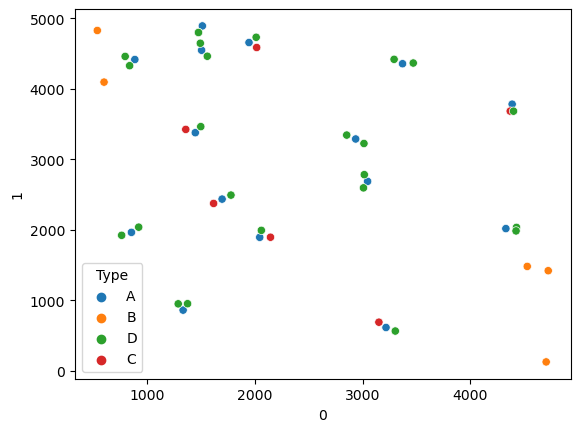

In [31]:
example_01 = '../data/simulation_coordiantes/example_01.csv'
nodes_01 = pd.read_csv(example_01)
sns.scatterplot(x = nodes_01.iloc[:,0], y = nodes_01.iloc[:,1], hue = nodes_01.iloc[:,2])


# Delunay Tri

In [35]:
points = nodes_01.iloc[:,[0,1]].values
types = nodes_01.iloc[:,2].values

Script loaded!


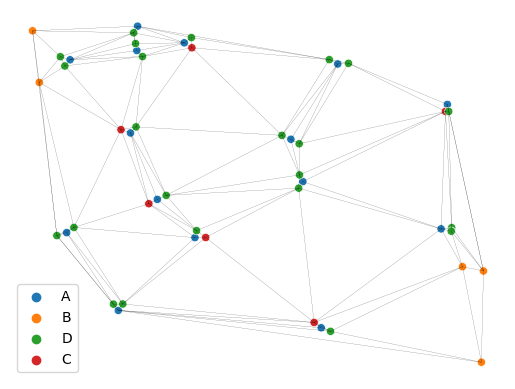

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
importlib.reload(SpAn)

# Perform Delaunay triangulation
tri = Delaunay(points)

tri_edges = set()

for simplex in tri.simplices:
    for i in range(3):
        edge = tuple(sorted([simplex[i], simplex[(i + 1) % 3]]))
        tri_edges.add(edge)

tri_edges = list(tri_edges)

SpAn.plot_network(points, tri_edges, types = types, linewidth = .1)

# Vernoi
##### Doesn't allow exporting list of edges

# KNN


In [121]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import networkx as nx
importlib.reload(SpAn)
# Example list of coordinates (points)
points = nodes_01.iloc[:,[0,1]].values
types = nodes_01.iloc[:,2].values
points = pd.DataFrame(points)
# Number of neighbors to consider (K value)
k = 3

G = nx.Graph()
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        G.add_edge(i, j)

edges = G.edges(data=True)

# Create DataFrame
df_edges = pd.DataFrame(edges, columns=['node1', 'node2', 'attributes'])

# Map indices to points (or coordinates)
df_edges['point1'] = df_edges['node1'].apply(lambda idx: points[idx])
df_edges['point2'] = df_edges['node2'].apply(lambda idx: points[idx])
knn_edges = pd.DataFrame(G.edges(), columns=['node1', 'node2'])

SpAn.plot_network(points, knn_edges.values, types = types, linewidth = .1)

Script loaded!


KeyError: 2

In [115]:
knn_edges.values

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       ...,
       [47, 48],
       [47, 49],
       [48, 49]])